In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [3]:
df=pd.read_csv('product b.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [4]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product B,Pain / Analgesic,January,2019,494357,2738080,177316,1
2019-02-01,Product B,Pain / Analgesic,February,2019,837207,4637013,300290,2
2019-03-01,Product B,Pain / Analgesic,March,2019,1278271,7079920,458491,3
2019-04-01,Product B,Pain / Analgesic,April,2019,675985,3744057,242463,4
2019-05-01,Product B,Pain / Analgesic,May,2019,757687,4196578,271768,5
2019-06-01,Product B,Pain / Analgesic,June,2019,1154891,6396559,414237,6
2019-07-01,Product B,Pain / Analgesic,July,2019,459535,2545212,164826,7
2019-08-01,Product B,Pain / Analgesic,August,2019,1136386,6294066,407600,8
2019-09-01,Product B,Pain / Analgesic,September,2019,984890,5454980,353261,9


In [5]:
sales_b= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [6]:
sales_b.shape

(60, 3)

In [7]:
sales_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [8]:
print('Total Sales:', sales_b['Sales'].sum())
print('Total Market Size:',sales_b['Market Size'].sum())
print('Total Marketing Expense:', sales_b['Marketing Expense'].sum())

Total Sales: 70016882
Total Market Size: 360874201
Total Marketing Expense: 19873176


Text(0.5, 1.0, 'Product B')

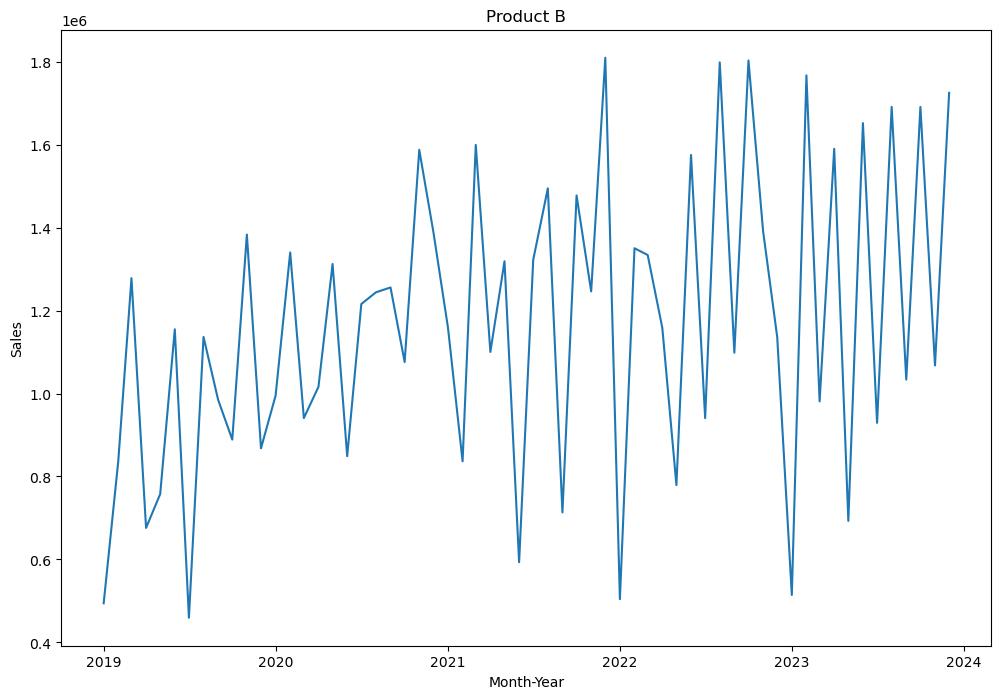

In [9]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_b['Sales'])
plt.title('Product B')

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adf_test(sales_b['Sales'])

ADF Statistics: -2.263078907366476
p- value: 0.18415230168794178
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
sales_b_diff= sales_b['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product B - First Difference')

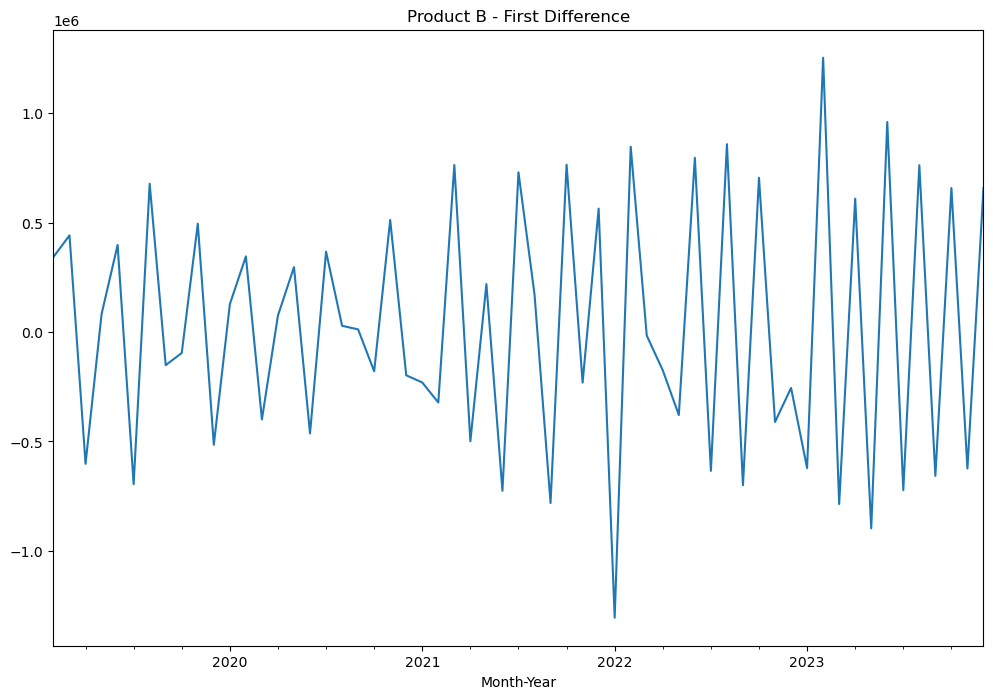

In [14]:
sales_b_diff.plot(figsize=(12,8))
plt.title('Product B - First Difference')

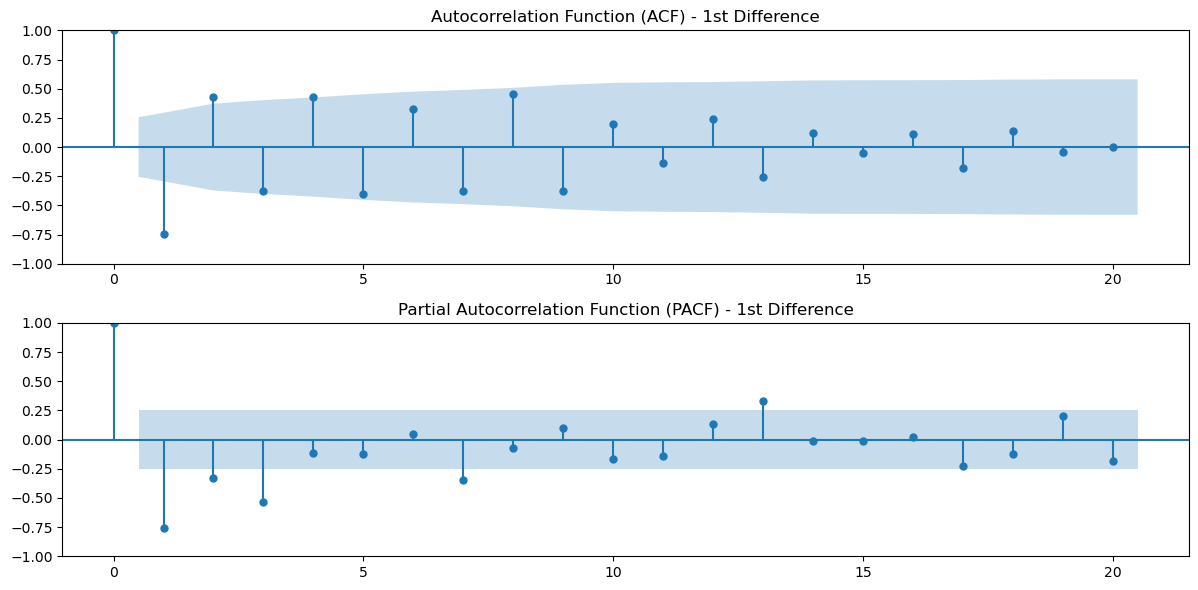

In [15]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_b_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_b_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [16]:
adf_test(sales_b_diff)

ADF Statistics: -10.617041136124557
p- value: 5.639859315327351e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [17]:
train= sales_b[:57]
test=sales_b[57:]

In [18]:
print(len(train),len(test))

57 3


In [19]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [20]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [21]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [22]:
order=[]
for p in range(5):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_b)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [40]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
7   1  3  1412.346922  1426.524384  13174.238205  2.527581e+08  15898.369015
11  2  3  1413.593596  1429.796410  12030.687391  1.989401e+08  14104.613665
10  2  2  1413.638521  1427.815982  14101.543338  2.199234e+08  14829.815713
15  3  3  1415.374412  1433.602577  13350.056447  2.052627e+08  14326.993252
19  4  3  1416.639168  1436.892685  20185.370923  4.557360e+08  21347.973530
6   1  2  1418.193611  1430.345721  11872.947662  1.719530e+08  13113.083948
12  3  0  1418.406865  1430.558975   5174.556326  4.105271e+07   6407.238837
3   0  3  1419.040863  1431.192973  23308.613044  6.091845e+08  24681.662581
4   1  0  1419.465982  1427.567389   8467.134978  9.595364e+07   9795.592931
16  4  0  1419.855748  1434.033210   3143.954722  1.462198e+07   3823.869579
1   0  1  1420.012545  1428.113952   8464.953898  9.753683e+07   9876.073685
13  3  1  1420.235630  1434.413092   4014.019736  2.460699e+07   4960.543225

In [24]:
m_arima= ARIMA(train['Sales'], order=(1,1,3), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -699.173
Date:                Thu, 09 May 2024   AIC                           1412.347
Time:                        15:32:40   BIC                           1426.524
Sample:                    01-01-2019   HQIC                          1417.843
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2576      0.012     22.328      0.000       0.235       0.280
Marketing Expense    -1.1643      0.216     -5.383      0.000      -1.588      -0.740
ar.L1                -0.

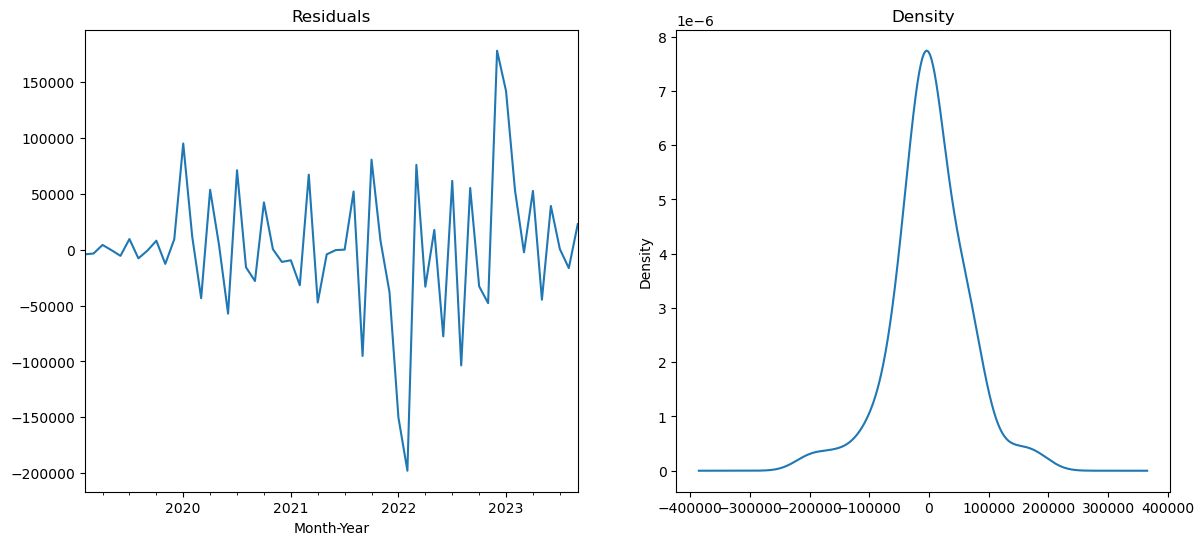

In [25]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

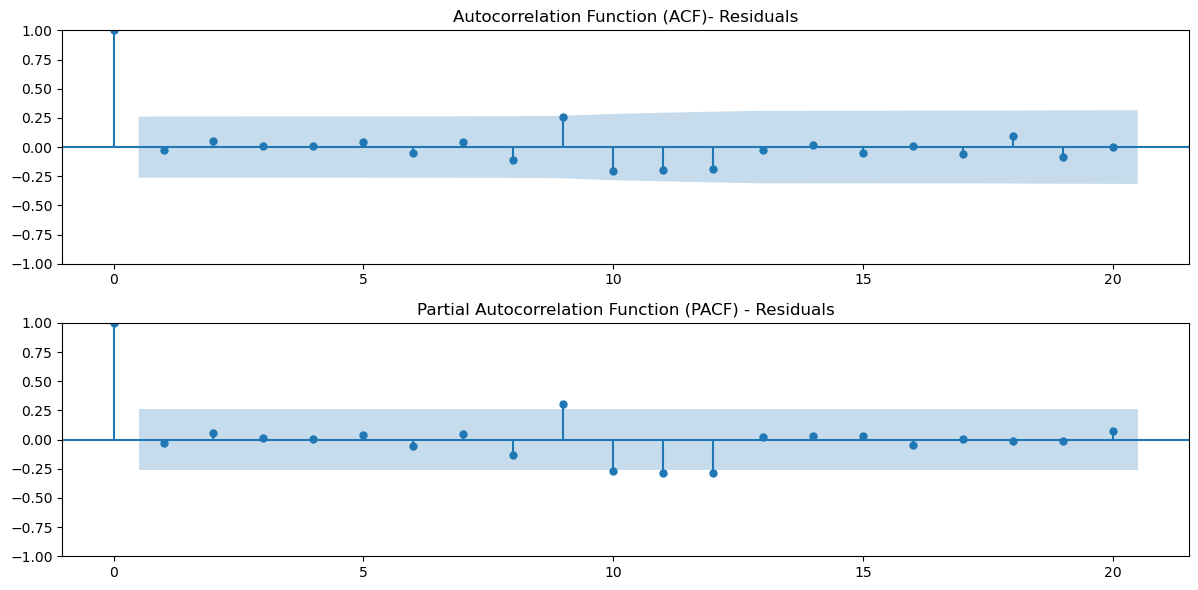

In [26]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

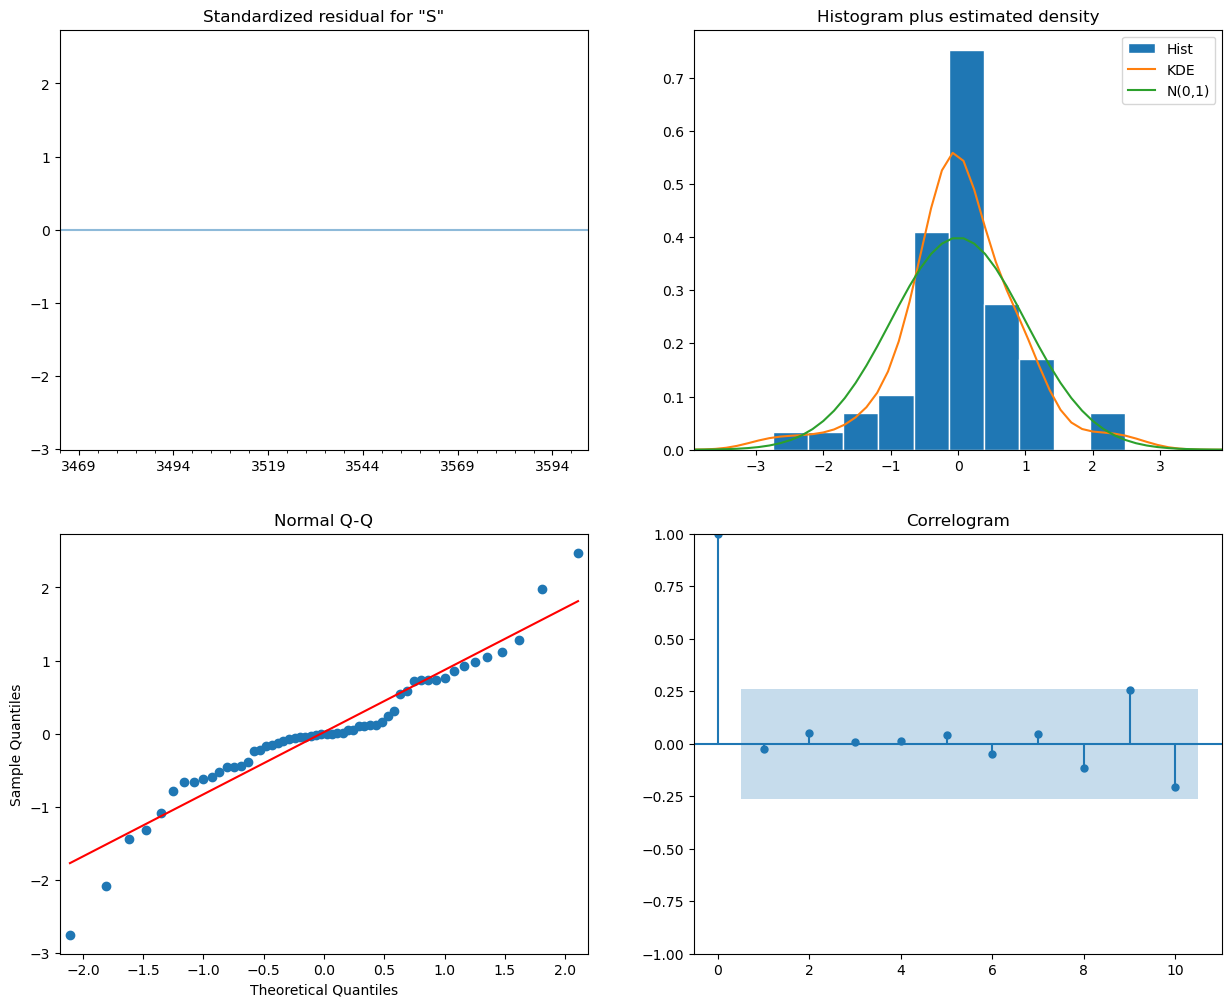

In [27]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [28]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [29]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [30]:
pred=model_arima.predict(start=len(train), end=(len(sales_b)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_b['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [31]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

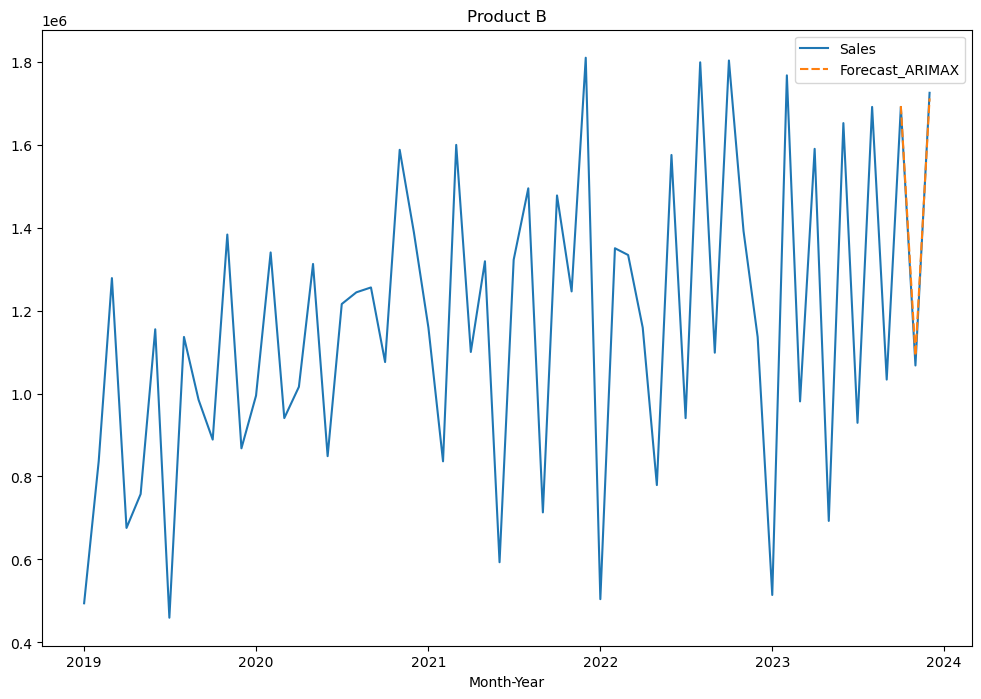

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_ARIMAX']])
plt.title('Product B')
plt.show()

In [33]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 13174.238205369329
MAPE - ARIMAX: 0.010494509358635518
MSE - ARIMAX: 252758137.35107848
RMSE - ARIMAX: 15898.36901543924


# SARIMA

In [34]:
import statsmodels.api as sm

In [35]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_b['Sales'], label='Original Series')
#axes[0].plot(sales_b['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_b['Sales'], label='Original Series')
#axes[1].plot(sales_b['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product B', fontsize=16)
#plt.show()

In [36]:
# Plot ACF and PACF
#plt.figure(figsize=(12, 6))
#plt.subplot(211)
#plot_acf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

#plt.subplot(212)
#plot_pacf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

#plt.tight_layout()
#plt.show()

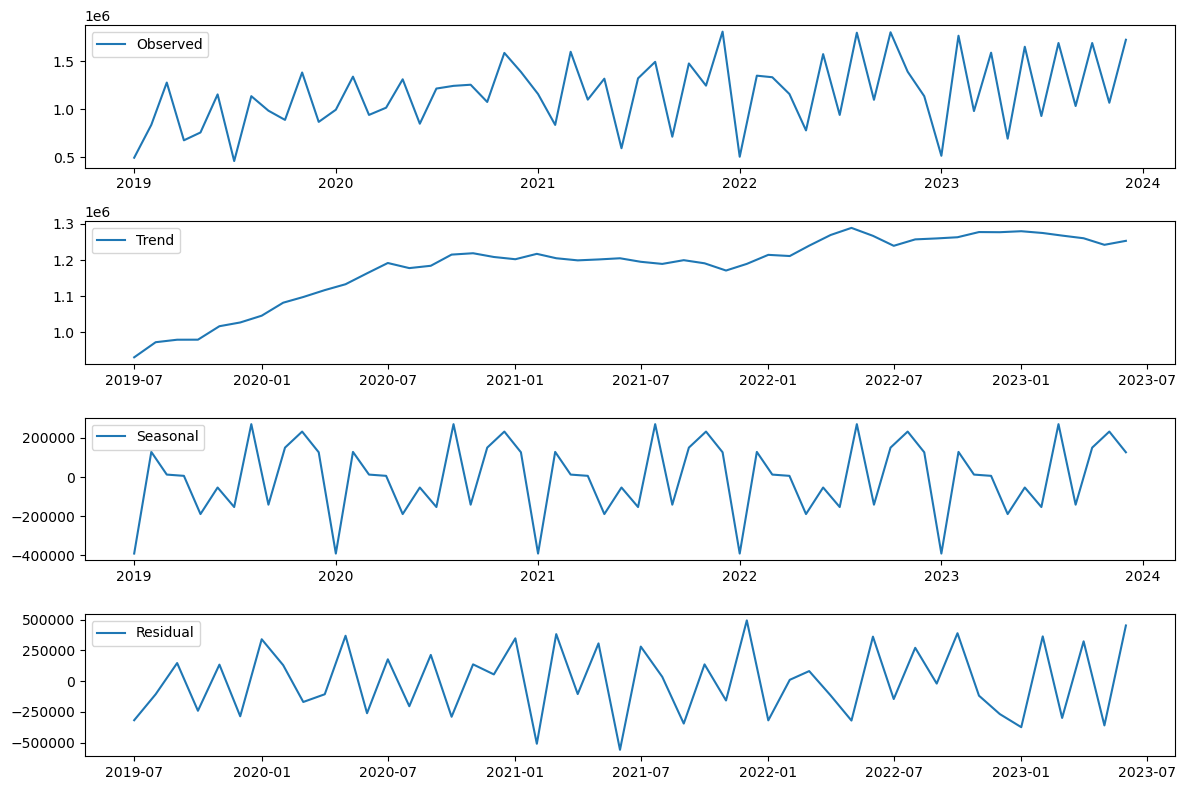

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_b['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

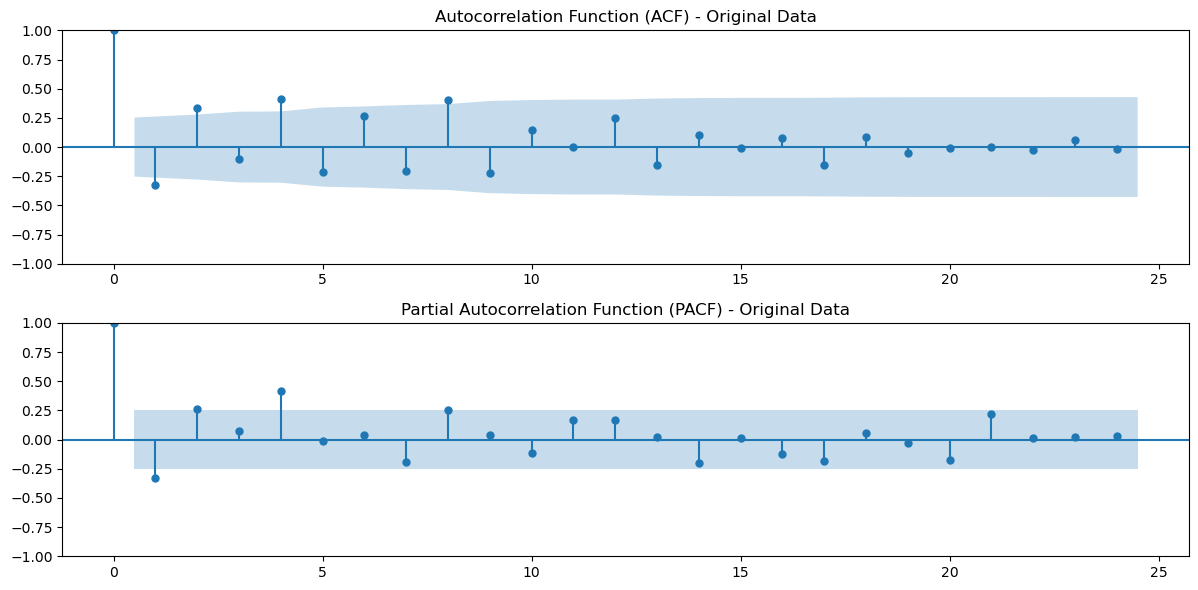

In [38]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_b['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_b['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [39]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(5):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1, 1, 3), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [41]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic           mae           mse
1   0  1  1411.514726  1427.717539  32863.534912  1.627303e+09
5   1  0  1411.941321  1428.144134  34890.097897  1.504689e+09
0   0  0  1412.346922  1426.524384  13174.238205  2.527581e+08
10  2  0  1413.263294  1431.491459  31310.391841  1.388547e+09
2   0  2  1413.585372  1431.813537  33679.907303  1.656807e+09
6   1  1  1413.594631  1431.822796  33755.744937  1.698888e+09
3   0  3  1415.164955  1435.418472  28166.898022  1.206379e+09
7   1  2  1415.444712  1435.698229  32154.886891  1.456104e+09
15  3  0  1415.575109  1435.828626  25918.971540  8.708402e+08
11  2  1  1415.724131  1435.977648  33301.788142  1.706033e+09
4   0  4  1417.197230  1439.476098  29234.567513  1.243549e+09
8   1  3  1417.258435  1439.537303  27109.652248  1.077348e+09
12  2  2  1417.275502  1439.554370  26962.912893  1.066715e+09
16  3  1  1417.324633  1439.603502  27509.122822  1.046235e+09
9   1  4  1419.205618  1443.509838  27897.849122  1.139

In [42]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 3),seasonal_order=(0,0,1,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   57
Model:             SARIMAX(1, 1, 3)x(0, 0, [1], 12)   Log Likelihood                -697.757
Date:                              Thu, 09 May 2024   AIC                           1411.515
Time:                                      15:36:36   BIC                           1427.718
Sample:                                  01-01-2019   HQIC                          1417.797
                                       - 09-01-2023                                         
Covariance Type:                                opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2637      0.015     17.168      0.000       0.234       0.29

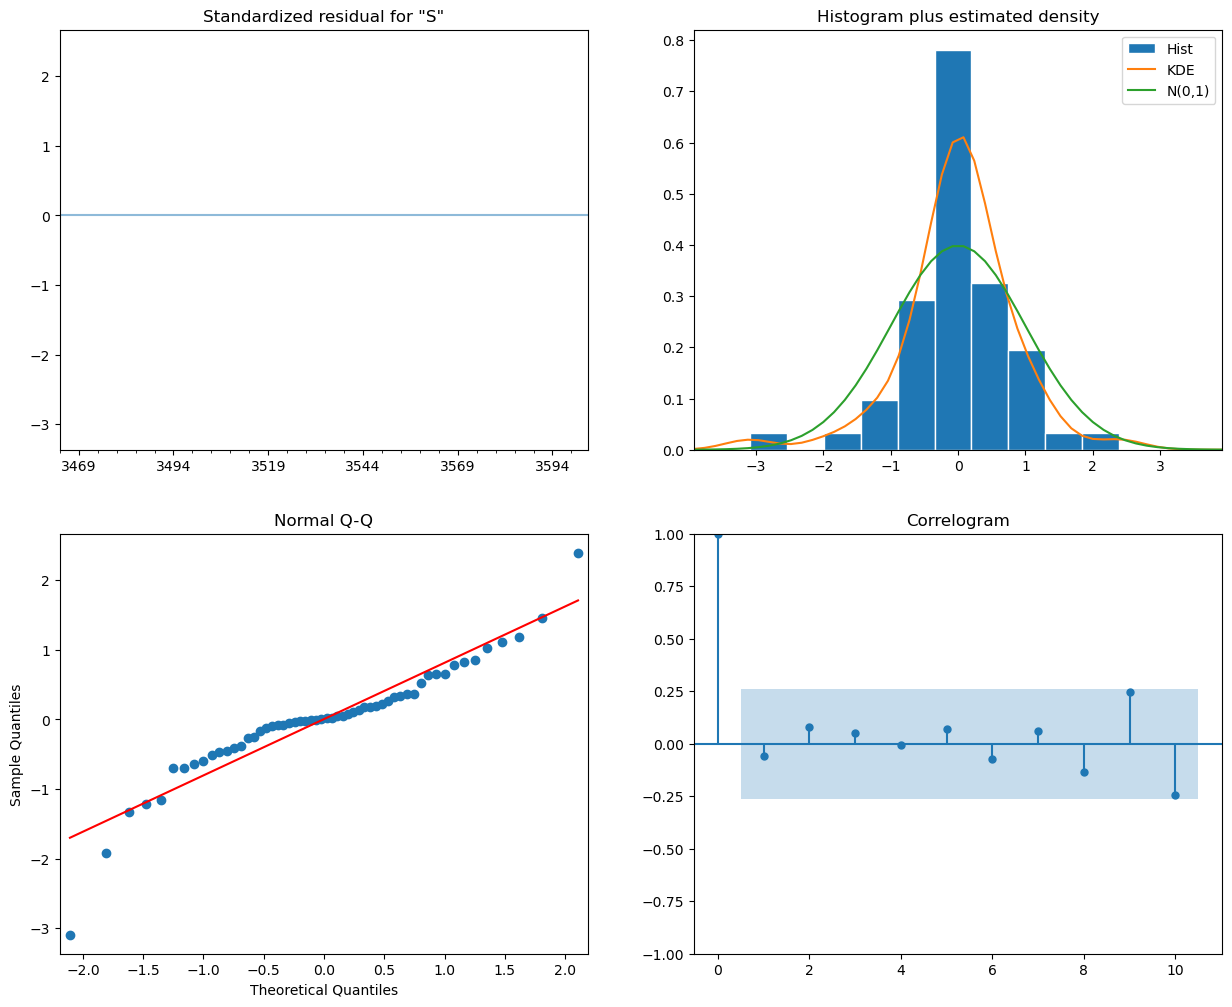

In [43]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [44]:
forecast_test_sarima=sarima_model.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [45]:
sales_b['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product B')

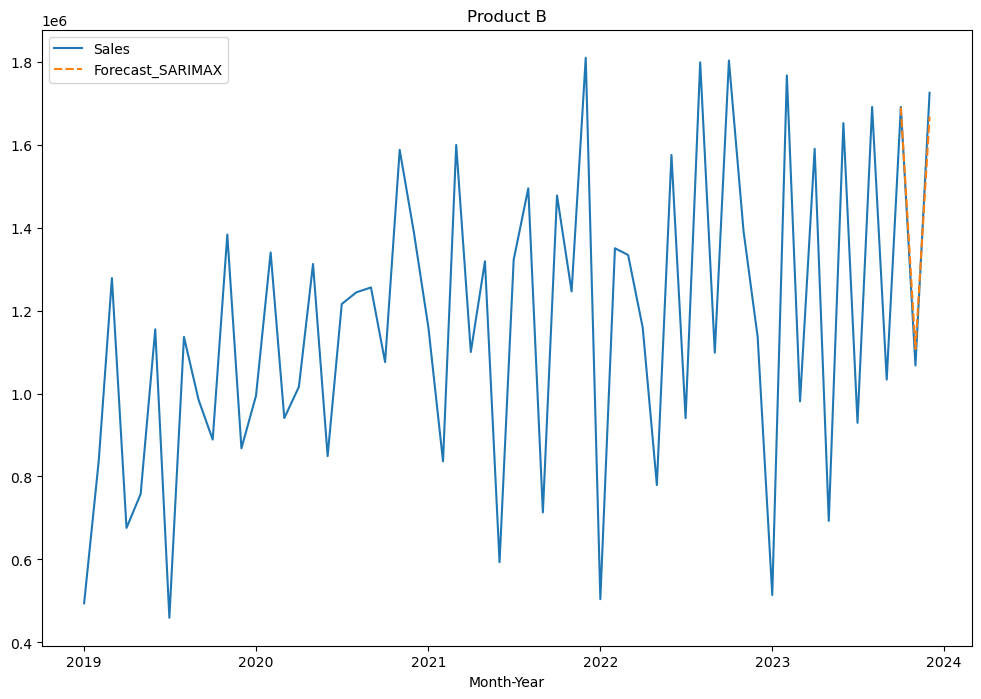

In [46]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_SARIMAX']])
plt.title('Product B')

In [47]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 32863.535
MAPE - SARIMAX: 0.024
MSE - SARIMAX: 1627303422.468
RMSE - SARIMAX: 40339.849


# AUTO-ARIMA

In [49]:
import pmdarima as pm

In [50]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=4 ,max_Q=4 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1649.336, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1644.012, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1644.759, Time=0.24 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=1646.733, Time=0.64 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=1648.268, Time=1.68 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1647.242, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1645.054, Time=0.11 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1646.748, Time=0.32 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=1648.762, Time=0.68 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=1650.268, Time=3.66 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1645.858, Time=0.13 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1646.484, Time=0.34 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1648.300, Time=0.57 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=1650.219, Time=1.69 sec
 ARIMA(0,1,0)(3,0,0)[12] intercept   : AIC=1646.301, Time=0.56

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [51]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -789.001
Date:                            Thu, 09 May 2024   AIC                           1588.003
Time:                                    15:38:38   BIC                           1598.130
Sample:                                01-01-2019   HQIC                          1591.929
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.278e+04   1.44e+04      1.583      0.113   -5418.013     5.1e+04
ar.L1         -0.4812      0.167     -2.879      0.004      -0.809      -0.154
ma.L1         -0.8141      0.128     -6.347      0.000      -1.065      -0.563
ma.S.L12       0.4466      0.188      2.380      0.017       0.079       0.814
sigma2      1.075e+11      0.003   3.49e+13      0.000    1.08e+11    1.08e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.60   Prob(JB):                         0.64
Heteroskedasticity (H):               1.09   Skew:                            -0.31
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+29. Standard errors may be unstable.
"""

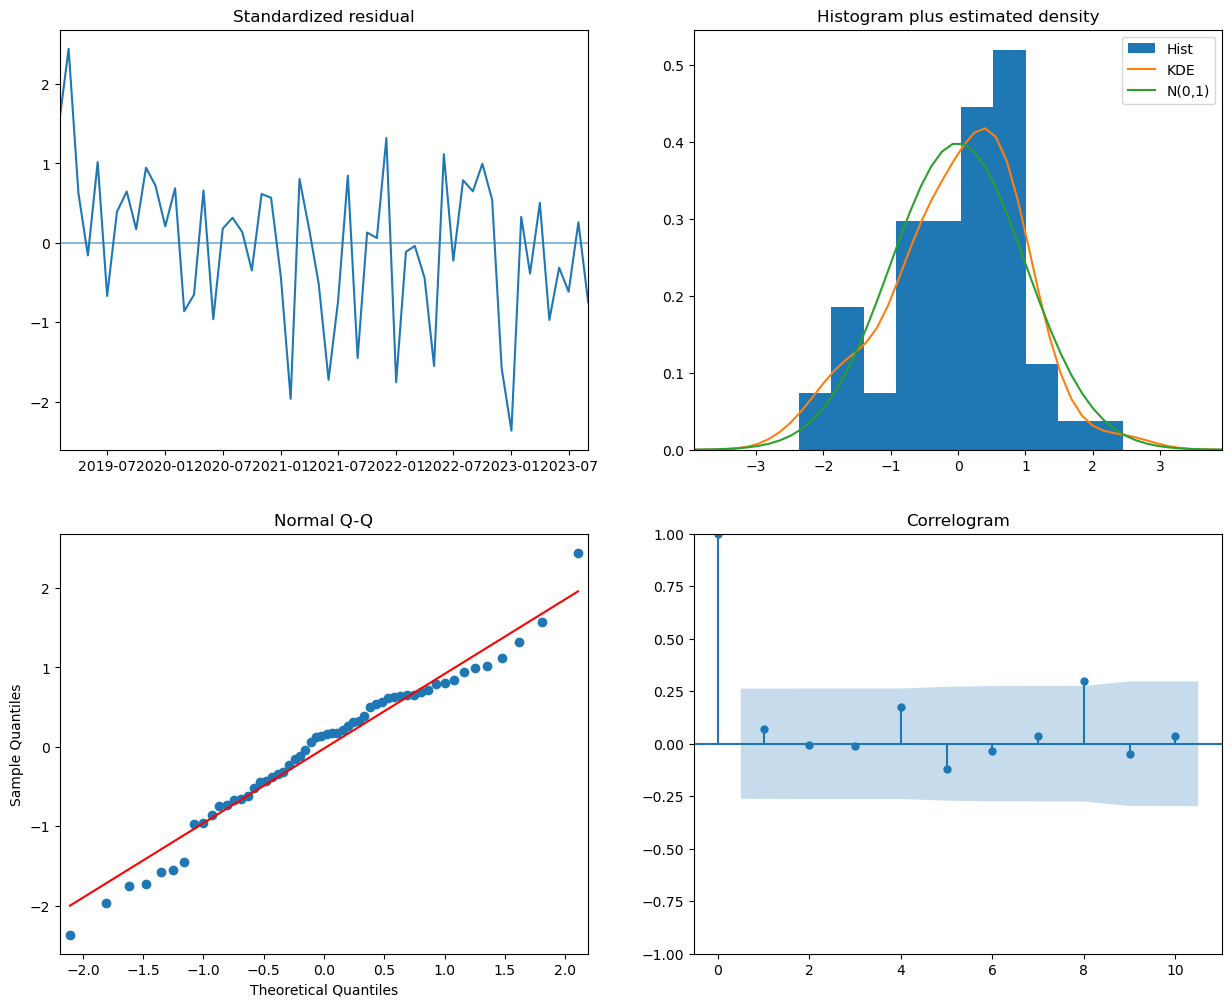

In [52]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [53]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_b['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product B')

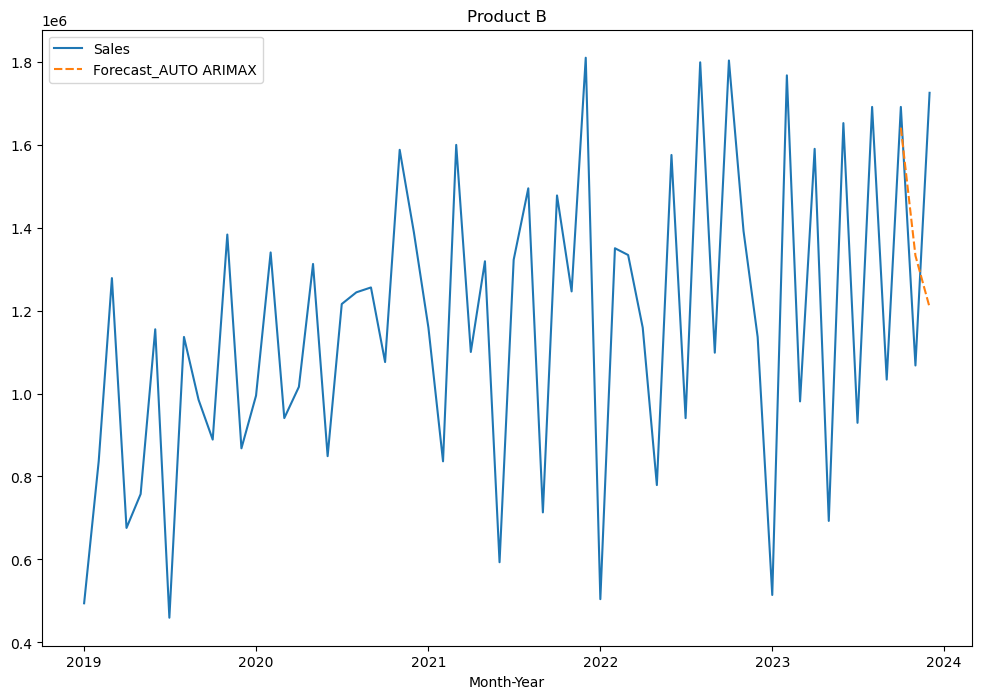

In [54]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product B')

In [55]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 277237.8967275915
MAPE - AUTO ARIMAX: 0.19241079770814884
MSE - AUTO ARIMAX: 113279368846.03284
RMSE - AUTO ARIMAX: 336570.00586212793


In [51]:
sales_b.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,514369,2955148,236101,NaN,NaN,NaN
2023-02-01,1767039,10151977,811092,NaN,NaN,NaN
2023-03-01,981026,5636182,450302,NaN,NaN,NaN
2023-04-01,1589911,9134343,729788,NaN,NaN,NaN
2023-05-01,692905,3980872,318051,NaN,NaN,NaN
2023-06-01,1651940,9490711,758260,NaN,NaN,NaN
2023-07-01,929333,5339196,426575,NaN,NaN,NaN
2023-08-01,1690948,9714819,776165,NaN,NaN,NaN
2023-09-01,1033615,5938316,474441,NaN,NaN,NaN


In [52]:
sales_b.mean()

Sales                   1.166948e+06
Market Size             6.014570e+06
Marketing Expense       3.312196e+05
Forecast_ARIMAX         1.498723e+06
Forecast_SARIMAX        1.559829e+06
Forecast_AUTO ARIMAX    1.514131e+06
dtype: float64

In [53]:
sales_b.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,514369,2955148,236101,NaN,NaN,NaN
2023-02-01,1767039,10151977,811092,NaN,NaN,NaN
2023-03-01,981026,5636182,450302,NaN,NaN,NaN
2023-04-01,1589911,9134343,729788,NaN,NaN,NaN
2023-05-01,692905,3980872,318051,NaN,NaN,NaN
2023-06-01,1651940,9490711,758260,NaN,NaN,NaN
2023-07-01,929333,5339196,426575,NaN,NaN,NaN
2023-08-01,1690948,9714819,776165,NaN,NaN,NaN
2023-09-01,1033615,5938316,474441,NaN,NaN,NaN


In [54]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,13174.238205,0.010495,2.527581e+08,15898.369015
AUTO ARIMAX,178432.018517,0.138941,4.316914e+10,207771.845350
SEASONAL ARIMAX,65325.135524,0.049193,4.695218e+09,68521.658347


# TESTING

In [27]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 , D=None, 
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1649.336, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1644.012, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1644.759, Time=0.17 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1647.242, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1645.054, Time=0.09 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1646.748, Time=0.26 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1645.858, Time=0.22 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1646.484, Time=0.31 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1648.300, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1606.755, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1601.385, Time=0.05 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1603.350, Time=0.21 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1605.950, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1602.480, Time=0.13 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.63 sec


ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [28]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -789.001
Date:                            Wed, 08 May 2024   AIC                           1588.003
Time:                                    18:32:20   BIC                           1598.130
Sample:                                01-01-2019   HQIC                          1591.929
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.278e+04   1.44e+04      1.583      0.113   -5418.013     5.1e+04
ar.L1         -0.4812      0.167     -2.879      0.004      -0.809      -0.154
ma.L1         -0.8141      0.128     -6.347      0.000      -1.065      -0.563
ma.S.L12       0.4466      0.188      2.380      0.017       0.079       0.814
sigma2      1.075e+11      0.003   3.49e+13      0.000    1.08e+11    1.08e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.60   Prob(JB):                         0.64
Heteroskedasticity (H):               1.09   Skew:                            -0.31
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+29. Standard errors may be unstable.
"""

In [29]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_b['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product B')

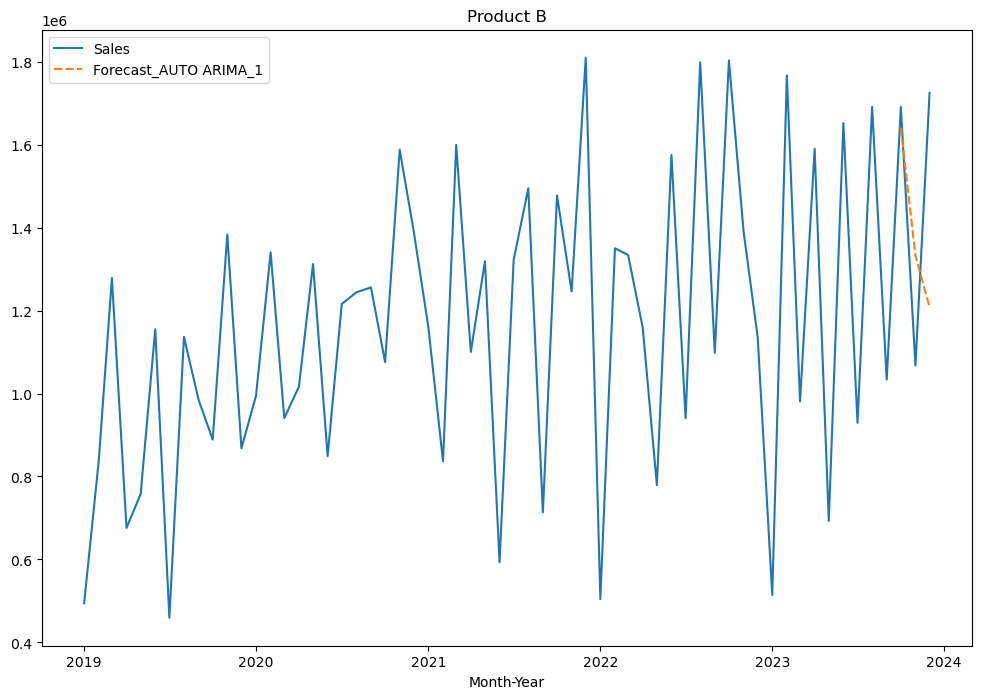

In [30]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product B')

In [31]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 277237.8967275915
MAPE - AUTO ARIMA: 0.19241079770814884
MSE - AUTO ARIMA: 113279368846.03284
RMSE - AUTO ARIMA: 336570.00586212793
